# Data Visualization 
# Exploratory Data Analysis
# Lab 04
Install Necessary Libraries

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as imdb.txt. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [3]:
#!head imdb.txt
data = pd.read_csv('imdb.txt',delimiter='\t')
data

,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
1,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
2,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
3,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
...,...,...,...,...,...,...,...
9994,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9995,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9996,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9997,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [4]:
# Your code here
data.columns = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data

,imdbID,title,year,score,votes,runtime,genres
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
1,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
2,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
3,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
...,...,...,...,...,...,...,...
9994,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9995,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9996,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9997,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


In [5]:
s1 = set(data.iloc[0,6].split('|'))
s2 = set(data.iloc[2,6].split('|'))
print(s1)
print(s2)
s2.union(s1)

{'Crime', 'Thriller'}
{'Adventure', 'Sci-Fi', 'Action'}


{'Action', 'Adventure', 'Crime', 'Sci-Fi', 'Thriller'}

__Marks = 2__

Check the data types of each column

In [6]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   imdbID   9999 non-null   object 
 1   title    9999 non-null   object 
 2   year     9999 non-null   int64  
 3   score    9999 non-null   float64
 4   votes    9999 non-null   int64  
 5   runtime  9999 non-null   object 
 6   genres   9998 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 546.9+ KB


__Marks = 1__

## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [7]:
# Your code here
string = '142 mins.'
num = pd.to_numeric(string.replace(' mins.',''))
num


142

__Marks = 3__

Perform this conversion on every element in the dataframe `data`

In [8]:
# Your code here
data['runtime'] = pd.to_numeric(data['runtime'].str.replace(' mins.',''))
data['runtime']

0       154
1       139
2       136
3       148
4       142
       ... 
9994     78
9995    100
9996    104
9997    179
9998     96
Name: runtime, Length: 9999, dtype: int64

__Marks = 2__

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [9]:
data.iloc[7916,6]
data = data.drop(7916)
# data.iloc[7916,6]

In [10]:
#determine the unique genres
unique_set = set()
genres = data['genres'].str.split('|')
print(genres)
for lis in genres:
    unique_set = unique_set.union(set(lis))
unique_set


0                           [Crime, Thriller]
1                  [Drama, Mystery, Thriller]
2                 [Action, Adventure, Sci-Fi]
3       [Action, Adventure, Sci-Fi, Thriller]
4                    [Comedy, Drama, Romance]
                        ...                  
9994                                  [Drama]
9995          [Comedy, Drama, Music, Romance]
9996               [Drama, Mystery, Thriller]
9997                       [Musical, Romance]
9998                          [Comedy, Drama]
Name: genres, Length: 9998, dtype: object


{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

__Marks = 4__

Then make a column for each genre

In [11]:
#make a column for each genre
for i in unique_set:
    data[i] = data['genres'].str.contains(i).astype(int)

data

,imdbID,title,year,score,votes,runtime,genres,Sci-Fi,Fantasy,Reality-TV,Comedy,Action,Family,Music,War,Drama,Horror,Adult,Biography,Romance,News,Crime,Adventure,Sport,Thriller,Animation,Musical,Mystery,Film-Noir,Western,History
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142,Comedy|Drama|Romance,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,tt0807721,Meduzot (2007),2007,7.0,1357,78,Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9995,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100,Comedy|Drama|Music|Romance,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9996,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104,Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9997,tt0152836,Taal (1999),1999,6.5,1356,179,Musical|Romance,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


__Marks = 5__

### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [12]:
#Strip off last 7 character from title
data['title'] = data['title'].str[:-7]
data['title']


0                 Pulp Fiction
1                   Fight Club
2                   The Matrix
3                    Inception
4                 Forrest Gump
                 ...          
9994                   Meduzot
9995            Daltry Calhoun
9996    The Quiller Memorandum
9997                      Taal
9998            The Navigators
Name: title, Length: 9998, dtype: object

__Marks = 1__

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [13]:
data

,imdbID,title,year,score,votes,runtime,genres,Sci-Fi,Fantasy,Reality-TV,Comedy,Action,Family,Music,War,Drama,Horror,Adult,Biography,Romance,News,Crime,Adventure,Sport,Thriller,Animation,Musical,Mystery,Film-Noir,Western,History
0,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,tt0109830,Forrest Gump,1994,8.7,368994,142,Comedy|Drama|Romance,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,tt0807721,Meduzot,2007,7.0,1357,78,Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9995,tt0339642,Daltry Calhoun,2005,5.2,1357,100,Comedy|Drama|Music|Romance,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9996,tt0060880,The Quiller Memorandum,1966,6.5,1356,104,Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9997,tt0152836,Taal,1999,6.5,1356,179,Musical|Romance,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [14]:
#Call `describe` on relevant columns
data[['score','runtime','votes']].describe()


,score,runtime,votes
count,9998.000000,9998.000000,9998.000000
mean,6.385707,103.576515,16545.163533
std,1.189691,26.627869,34036.605554
min,1.500000,0.000000,1356.000000
25%,5.700000,93.000000,2334.250000
50%,6.600000,102.000000,4980.500000
75%,7.200000,115.000000,15274.750000
max,9.200000,450.000000,555122.000000


__Marks = 1__

Do you see any quantity unusual. Better replace with NAN.

In [15]:
#Your code here
data.min()
data = data.replace(data.min(),np.nan)


__Marks = 1__

Lets repeat describe to make sure that it is fine

In [16]:
#Your code here
data[['score','runtime','year','votes']].describe()

,score,runtime,year,votes
count,9991.000000,9716.00000,9967.000000,9993.000000
mean,6.389130,106.58275,1993.606602,16552.763434
std,1.183055,20.22818,14.654008,34043.424052
min,1.600000,45.00000,1951.000000,1357.000000
25%,5.700000,93.00000,1986.000000,2337.000000
50%,6.600000,103.00000,1998.000000,4987.000000
75%,7.200000,115.00000,2005.000000,15280.000000
max,9.200000,450.00000,2011.000000,555122.000000


__Marks = 1__

### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

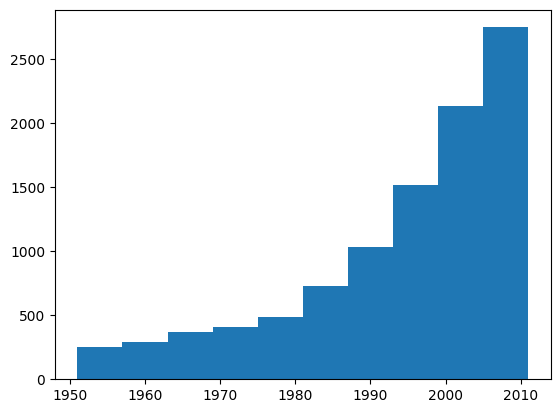

In [28]:
#Your code here
plt.hist(data['year'])
plt.show()

__Marks = 1__

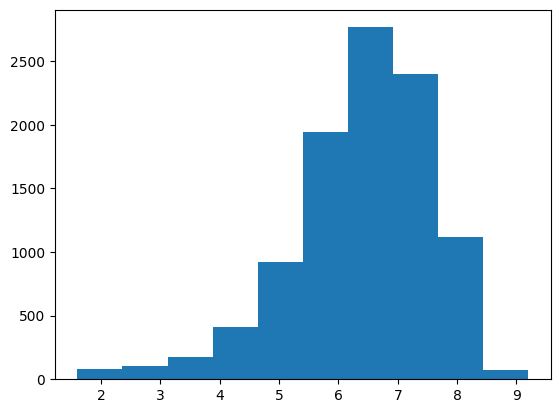

In [31]:
#Your code here
plt.hist(data['score'])
plt.show()

__Marks = 1__

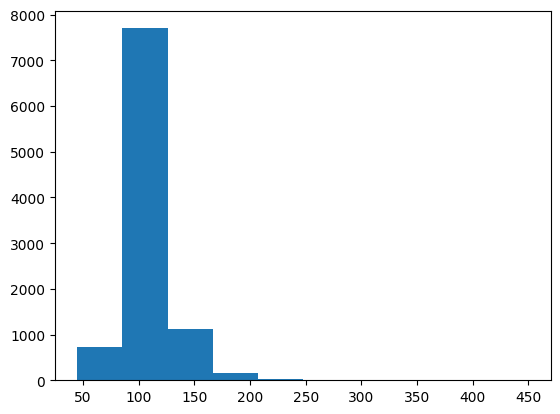

In [32]:
#Your code here
plt.hist(data['runtime'])
plt.show()

__Marks = 1__

Scatter plot between IMDB rating and years. Does it shows some trend?

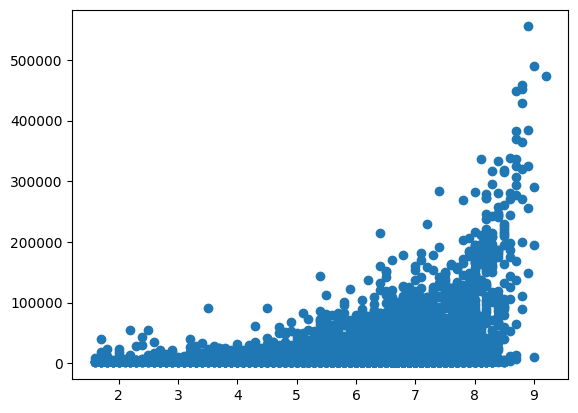

In [35]:
#Your code here
plt.scatter(data['score'],data['votes'])

__Marks = 2__

Is there any relationship between IMDB rating and number of votes? Describe

__Marks = 2__

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [39]:
#Your code here
#sum sums over rows by default
genre_count = data.iloc[:,7:].sum()
genre_count.sort_values(ascending=False, inplace=True)
genre_count
    

Drama         5696.0
Comedy        3922.0
Thriller      2832.0
Romance       2441.0
Action        1891.0
Crime         1866.0
Adventure     1313.0
Horror        1215.0
Mystery       1009.0
Fantasy        916.0
Sci-Fi         897.0
Family         754.0
Music          619.0
War            512.0
Biography      394.0
History        358.0
Animation      314.0
Sport          288.0
Musical        260.0
Western        235.0
Film-Noir       40.0
Adult            9.0
News             1.0
Reality-TV       1.0
dtype: float64

__Marks = 2__

Draw a bar plot to show top ten genres

In [47]:
#Your code here
top_ten = genre_count
# plt.bar(genre_count[:10][0],genre_count[:10][1])

Drama        5696.0
Comedy       3922.0
Thriller     2832.0
Romance      2441.0
Action       1891.0
Crime        1866.0
Adventure    1313.0
Horror       1215.0
Mystery      1009.0
Fantasy       916.0
dtype: float64

__Marks = 2__

*How many genres does a movie have, on average?*

In [24]:
#Your code here
#axis=1 sums over columns instead


__Marks = 2__

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=score-year-plot.png>

In [25]:
#Your code here


__Marks = 5__

Find the most popular movie each year


In [26]:
#Your code here


__Marks = 2__